<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Natural-Language-Processing/blob/main/2348505_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The tasks performed are:
1. Exploratory Data Analysis
2. Plot WordCloud
3. Data cleaning (Removing Punctuations)
4. Data cleaning (Removing Stopwords)
5. Countvectorization (Tocknization)
6. Create pipeline to perform Task 3,4,5
7. Train Naive Bayes Classifier
8. Annalyze Model Performance

In [2]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [3]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
train_data.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [6]:
train_data.shape

(31962, 3)

In [7]:
train_data = train_data.drop('id', axis = 1)

**EXPLORATORY DATA ANALYSIS**

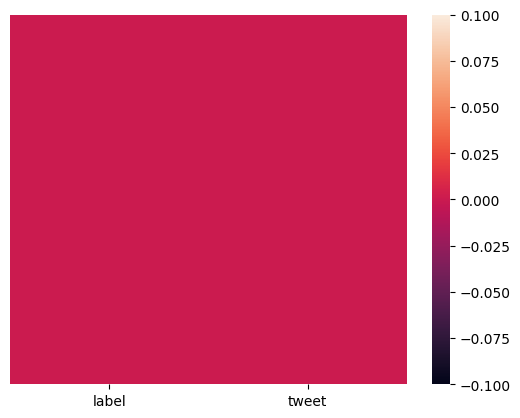

In [8]:
sns.heatmap(train_data.isnull(), yticklabels = False)
plt.show()

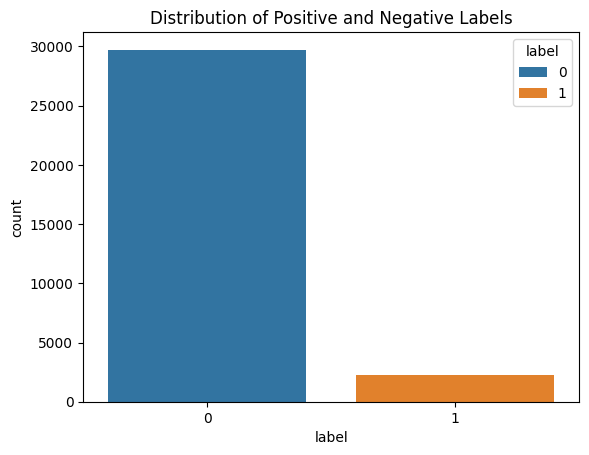

In [9]:
sns.countplot(x = train_data['label'],hue=train_data['label'])
plt.title("Distribution of Positive and Negative Labels")
plt.show()

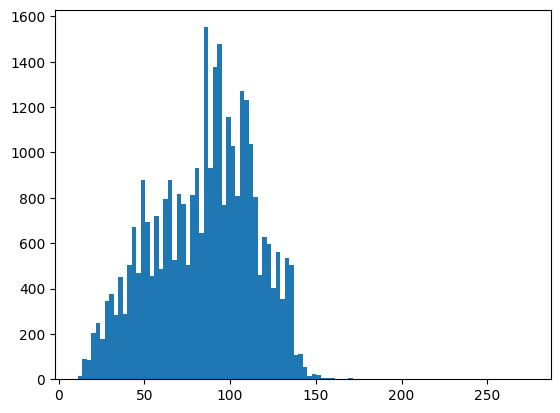

In [10]:
length = list()
for i in range(len(train_data)):
    length.append(len(train_data.iloc[i,1]))
train_data['length'] = length
plt.hist(train_data['length'], bins = 100)
plt.show()

In [11]:
positive = train_data[train_data['label'] == 0]
positive.describe()

,label,length
count,29720.0,29720.000000
mean,0.0,84.328634
std,0.0,29.566484
min,0.0,11.000000
25%,0.0,62.000000
50%,0.0,88.000000
75%,0.0,107.000000
max,0.0,274.000000


In [12]:
negative = train_data[train_data['label'] == 1]
negative.describe()

,label,length
count,2242.0,2242.000000
mean,1.0,90.187779
std,0.0,27.375502
min,1.0,12.000000
25%,1.0,69.000000
50%,1.0,96.000000
75%,1.0,111.000000
max,1.0,152.000000


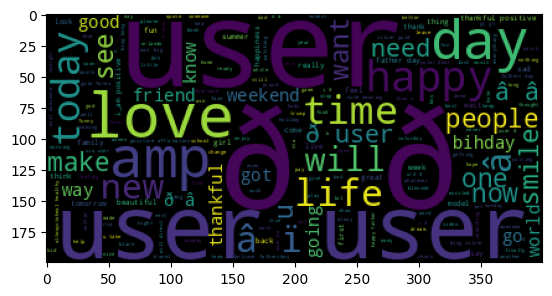

In [13]:
sentences = train_data['tweet'].tolist()
combined_sentences = " ".join(sentences)
plt.imshow(WordCloud().generate(combined_sentences))
plt.show()

**DATA CLEANING**

**Removing Stopwords**

In [14]:
st = stopwords.words('english')
st.append("and")

In [15]:
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed = ''.join(test_punc_removed)
    test_punc_st_removed = []
    for char in test_punc_removed.split():
        if char.lower() not in st:
            test_punc_st_removed.append(char)
    test_punc_st_removed = " ".join(test_punc_st_removed)
    return test_punc_st_removed

In [16]:
train_data_clean = train_data['tweet'].apply(message_cleaning)

In [17]:
data = train_data_clean.tolist()

In [18]:
tweets_countvectorizer = CountVectorizer().fit_transform(data).toarray()
tweets_countvectorizer.shape

(31962, 43671)

In [19]:
X = tweets_countvectorizer
y = train_data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

In [ ]:
y_pred = NB_classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm, annot = True)

In [ ]:
ac = accuracy_score(y_test, y_pred)
ac

In [ ]:
print(classification_report(y_test, y_pred))